In [1]:
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt


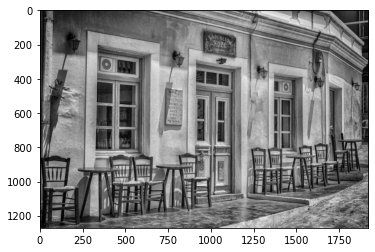

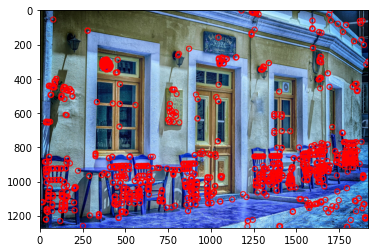

In [2]:
from scipy import ndimage as ndi
img= cv2.imread('./images/image_2.jpg') 
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img_gray=cv2.GaussianBlur(img_gray,(9,9),1)
plt.imshow(img_gray,cmap="gray")
plt.show()

def laplacian_filter(image,kernel_type=2):
    image=np.float32(image)
    kernel=[]
    if kernel_type==0: kernel=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    elif kernel_type==1: kernel=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    elif kernel_type==2: kernel=np.array([[1,1,1],[1,-8,1],[1,1,1]])
    return cv2.filter2D(image,-1,kernel)

def find_corners(img_gray,k=.04):
    Ix =laplacian_filter(img_gray,0)
    Iy = laplacian_filter(img_gray,1)
    Ixx = cv2.GaussianBlur(Ix**2,(9,9),1)
    Ixy =cv2.GaussianBlur(Iy*Ix,(9,9),1)
    Iyy = cv2.GaussianBlur(Iy**2,(9,9),1)
    
    det_A = Ixx * Iyy - Ixy ** 2
    trace_A = Ixx + Iyy
    corners= det_A - k * trace_A ** 2
    corners= cv2.dilate(corners,None) 
    corners_image = np.copy(img)
    thres=.1*corners.max()
    for r_idx, corner in enumerate(corners):
        for c_idx, r in enumerate(corner):
            if r > thres:
                corners_image[r_idx, c_idx] = [0,0,255]
                cv2.circle(corners_image,(c_idx,r_idx),15,(255,0,0),2)
        
    return corners_image


corners_img=find_corners(img_gray)
plt.imshow(corners_img)
plt.show()